# Tutorial: Classification with scikit-learn

The following tutorial contains examples for solving classification problems using Python's scikit-learn packages. 

Classification is the task of predicting a categorical attribute (known as class label) based on the values of other attributes (sometimes called predictor attributes). 

## 1. Vertebrate Dataset

We'll use a variation of the vertebrate data described in Chapter 3 of the "Introduction to Data Mining" textbook. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a binary representation (0 for False, 1 for True). Load the data into a Pandas DataFrame object and display its content.

In [17]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Given the limited number of training examples, let's convert the problem into a binary classification task (mammals versus non-mammals). We can do so by replacing the class labels of the instances to *non-mammals* except for those that belong to the *mammals* class.

In [18]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


## 2. Decision Tree Classifier

In this section, we apply a decision tree classifier to the vertebrate dataset.

We first need to separate the class labels (Y) from the predictor attributes (X). 

In [19]:
# Pull out just the Class column (Y); the labels; the attribute you are trying to predict
data_Y = data['Class']

# Get the rest of the attributes (X); the predictors; the features
# In this particular dataset, we want to also drop the 'Name' feature, as it would
# not make sense to use this as a predictive feature [this is Feature Selection!]
data_X = data.drop(['Name','Class'],axis=1)

print(data_X.shape) #15 rows, 6 cols
print(data_Y.shape) #15 rows, (1 col)

(15, 6)
(15,)


Now we want to train a decision tree classifier on this training data. This will build a decision tree. 

You will first create a `sklearn.tree.DecisionTreeClassifier` object by setting any arguments you want to set on it (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Then you will call `fit` on this `DecisionTreeClassifier` and pass in the attributes (data_X), and the class labels (data_Y). This builds the decision tree based on the training data you just passed in to it. It fits the model to the labeled data. 

In [20]:
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier

# Create a decision tree - set whichever arguments you want set
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
# Train it
clf = clf.fit(data_X, data_Y)

# The trained tree is now stored in the variable 'clf'

You can see what the tree looks like by using `sklearn.tree.plot_tree`.

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 15\nvalue = [5, 10]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]')]

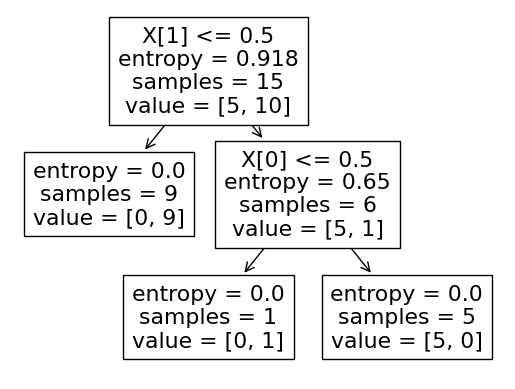

In [21]:
tree.plot_tree(clf)

Next, suppose we want to use our decision tree to classify the following test examples. These are labeled test examples, so we will know whether or not our tree classified them correctly.

In [22]:
# Make some new records for our tree to classify and put them in a DataFrame
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In order to run these through our tree, we need to separate the class label (Y) from the other attributes (X). 

In [23]:
# We also drop the 'name' attribute as we did on our training data
test_Y = testData['Class']
test_X = testData.drop(['Name','Class'],axis=1)
test_X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


Now we can run these test records through our decision tree and see what class it predicts for each of them.

In [24]:
pred_Y = clf.predict(test_X)
print(pred_Y)

# Put the predictions into a pretty table to look at them
predictions = pd.concat([testData['Name'],
                         pd.Series(pred_Y,name='Predicted Class'), 
                         testData['Class']], 
                         axis=1)
predictions

['non-mammals' 'non-mammals' 'non-mammals' 'mammals']


,Name,Predicted Class,Class
0,gila monster,non-mammals,non-mammals
1,platypus,non-mammals,mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


The classifier correctly predicted the class of all the test examples except for platypus, which is an egg-laying mammal. 

We can calculate the accuracy of the classifier on the test data by using `sklearn.metrics.accuracy_score` (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) and passing in the actual labels (test_Y) and the predicted labels (pred_Y).

In [25]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is:', (accuracy_score(test_Y, pred_Y)))

Accuracy on test data is: 0.75


## 3. Train-Test Split: Holdout Method

If you want to separate your entire dataset into a training set and a test set, `sklearn.model_selection.train_test_split` (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)) can do this for you. 

It will return the training data split into its features (train_X) and labels (train_Y), as well as the test data split into its features (test_X) and labels (test_Y).

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20)
print(type(X_train))
print("X_train=",X_train.shape, " y_train=", y_train.shape)
print("X_test=",X_test.shape, " y_test=", y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X_train= (12, 6)  y_train= (12,)
X_test= (3, 6)  y_test= (3,)


Then you can build a tree based on your training data, and test that tree on your test data.

In [27]:
clf = tree.DecisionTreeClassifier() # create the DT classifier
clf = clf.fit(X_train, y_train)     # train it on the training data
preds = clf.predict(X_test)        # run the test set through the tree
print('Accuracy on test data is:', (accuracy_score(y_test, preds)))   # how well did it do?

Accuracy on test data is: 1.0


Just doing a single test-train split is called the "holdout method." In class we discussed why doing a single holdout is not a good idea. Instead, we will want to use cross-validation to asses how well our tree performs.

## 4. Cross-Validation

You can use `sklearn.model_selection.cross_val_score` (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) to perform K-fold cross validation on your decision tree. 

You will pass in your whole dataset (separated by features and labels: data_X and data_Y) and `cross_val_score` will do all of the splitting in to train and test sets for you. It will train the classifier on the training set, then it will test the classifier on the test set, and it will record the accuracy for each fold. 

It runs the entire cross-validation loop, using the number of folds you specify, and returns a list of accuracies, 1 accuracy value per fold. You can average these to get the average accuarcy from the cross-validation.

In [28]:
from sklearn.model_selection import cross_val_score

# Use the full dataset
print(data_X.shape)
print(data_Y.shape)


# Let's start fresh with a new decision tree...
clf = tree.DecisionTreeClassifier() # set any params you may want to set

# Run a 5-fold cross validation
scores = cross_val_score(clf, data_X, data_Y, cv=5) 
print("Scores:", scores)                                            

print("Accuracy:", scores.mean()*100)

(15, 6)
(15,)
Scores: [1.         0.66666667 0.66666667 1.         1.        ]
Accuracy: 86.66666666666666


## 4. Hyperparameter tuning and Nested Cross-Validation

We'll want to tune our model to use the best parameters to avoid overfitting to our training data. Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of parameters specified in a grid. 

Using `sklearn.model_selection.GridSearchCV` (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)) will find the best hyperparameters for your tree. 

Let's find the best `max_depth`, using a 3-fold cross-validation. 

In [29]:
from sklearn.model_selection import GridSearchCV

# Let's start fresh with a new decision tree...
clf = tree.DecisionTreeClassifier()

# Try max_depth values of 2,4,6,8
# Try min_samples_leaf values of 1,2,3
params = {"max_depth": [2,4,6,8] }#, 
         #"min_samples_leaf": [1,2,3]}


# Create the GridSearchCV object:
# Pass in our classifier (the decision tree), the parameters to test,
# how many folds of CV we want, and what scoring metric to use
grid_search = GridSearchCV(clf, params, cv=3, scoring='accuracy')

# Kick it off... start training classifiers with the different max_depths specified
# A 3-fold CV will be run for each max_depth and accuracy will be assesed for each max_depth
grid_search.fit(data_X, data_Y)

# What did it find as the best max_depth?
print(grid_search.best_params_)
# What was the accuracy at this best max_depth?
print("Accuracy:", grid_search.best_score_*100)

{'max_depth': 2}
Accuracy: 86.66666666666667


The above hyperparameter tuning was performed on the entire dataset. We did not hold out a test set.

In order to hold out a test set and perform the nested cross-validation that we discussed in class, you'll now need to pass the `GridSearchCV` you just created into a `cross_val_score`. 

What this does is: the `cross_val_score` splits the data in to train and test sets for the first fold, and it passes the train set into `GridSearchCV`. 

`GridSearchCV` then splits that set into train and validation sets for k number of folds (the inner CV loop). The hyper-parameters for which the average score over all inner iterations is best, is reported as the `best_params_`, `best_score_`, and `best_estimator_`(best decision tree). 

This best decision tree is then evaluated with the test set that was set aside from the `cross_val_score` (the outer CV loop). And this whole thing is repeated for the remaining k folds of the `cross_val_score` (the outer CV loop). 

That is a lot of explanation for a very complex (but IMPORTANT) process, which can all be performed with a single line of code!

In [30]:
nested_score = cross_val_score(grid_search, data_X, data_Y, cv=3)

print("Accuracy:", nested_score.mean()*100)

Accuracy: 93.33333333333333


## 5. Dimensionality Reduction with PCA

Data should be standardized before running PCA, so that every feature is compared on the same scale.

Note that you should scale the data and fit the PCA on the **training set** only (NOT the test set).

You can use `sklearn.preprocessing.StandardScaler` (documentation [here](sklearn.preprocessing.StandardScaler)) to standardize the dataset’s features (mean = 0 and variance = 1). Be sure to only standardize the the features, not the class labels. Note that StandardScaler returns a numpy array.

In [31]:
from sklearn.preprocessing import StandardScaler

# Split the data into a train/test split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20, random_state=None)
print("X_train=",X_train.shape, " y_train=", y_train.shape)
print("X_test=",X_test.shape, " y_test=", y_test.shape)

# Use 'fit_transform' rather than 'fit' 
# so the data actually gets transformed into scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print()
print(type(X_train_scaled))
print(X_train_scaled.shape)

# make sure the data got scaled correctly
print()
print(X_train_scaled[0])
print("mean=", X_train_scaled.mean()) #mean should be 0
print("std=", X_train_scaled.std())   #std should be 1

X_train= (12, 6)  y_train= (12,)
X_test= (3, 6)  y_test= (3,)

<class 'numpy.ndarray'>
(12, 6)

[ 1.          1.18321596 -1.18321596  2.23606798  0.84515425  1.18321596]
mean= -2.4671622769447922e-17
std= 0.9999999999999999


PCA is affected by the scale of the features that is why it is important to standardize the dataset first. The principle components generated by PCA are sensitive to the shape of the data in d-dimensional space. 

Carry out a principal components analysis using `sklearn.decomposition.PCA` (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). 

In [32]:
from sklearn.decomposition import PCA

# Fit PCA to the training set. Use fit_transform to transform the data to the PCA space.
pca = PCA()
pca_data = pca.fit_transform(X_train_scaled)

# The PCA-transformed data is now in the variable pca_data

# Convert pca_data from a 2D numpy array to a DataFrame to view it
pca_data_df = pd.DataFrame(pca_data)
pca_data_df.head()

,0,1,2,3,4,5
0,2.987710,-0.394193,-0.184387,-0.785163,1.078738,0.135390
1,1.473166,1.193255,-0.484181,0.592872,-0.877784,-0.691420
2,-0.665046,-1.305557,-0.752473,-1.506798,-1.013366,0.322419
3,-0.811223,-1.799427,-0.126712,0.800136,0.417779,-0.126577
4,-0.427212,2.054758,-0.526576,0.165519,0.386576,0.754924


Project the data down on to lower dimensions, so that 80% of the variance of the data is retained. 

There are 2 ways to do this.

Method 1:

Use the `pca.explained_variance_ratio_` field to determine how many principal components are needed so that 80% variance is retained. 

Reduce the PCA-transformed-dataset to this number of columns.

In [33]:
import numpy as np

#how many colums are required to retain 80% variance
var_exp = pca.explained_variance_ratio_
print("Variance in each PC:", var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance:", cum_var_exp)

# find the index where the cumulative variance goes over 80
n_cols = 1 + np.argmax(cum_var_exp > 0.80)
print("n_cols to keep:", n_cols)

#reduce training set to this size
X_train_pca_1 = pca_data[:, :n_cols] # all rows, columns 0 to n_cols

Variance in each PC: [0.42824432 0.22278031 0.14924446 0.1149486  0.06025721 0.0245251 ]
Cumulative variance: [0.42824432 0.65102463 0.80026909 0.91521769 0.9754749  1.        ]
n_cols to keep: 3


Method 2:

Note that the PCA documentation states:
*If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.*

In [34]:
# This is method 2: set n_components to 0.8 and svd_solver to 'full'
pca_2 = PCA(n_components=0.8, svd_solver='full')
X_train_pca_2 = pca_2.fit_transform(X_train)

# Now the data has been reduced to the correct number of dimensions needed to 
# retain 80% of the variance. Note there are only 3 pricipal components (3 dimensions) kept
var_exp_2 = pca_2.explained_variance_ratio_
print("Variance in each PC:", var_exp_2)

cum_var_exp_2 = np.cumsum(var_exp_2)
print("Cumulative variance:", cum_var_exp_2)

Variance in each PC: [0.42870169 0.239233   0.1485049 ]
Cumulative variance: [0.42870169 0.6679347  0.8164396 ]


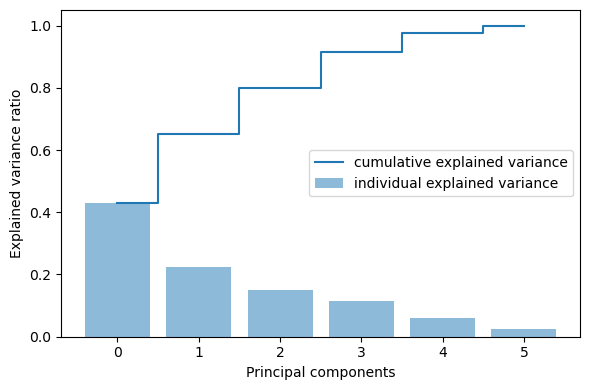

In [35]:
# Plot to visualize the variance in each principal component
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(range(6), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(6), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Once the training set's dimensionality has been reduced with PCA, transform the **test set** to the principal component space that was created. (Do not fit a new PCA. Use the same one that was created with the training set.)

In [36]:
# transform the test set to this space
# just call 'transform' on the existing scaler object and on 
# the existing pca object (do not call 'fit_transform', nor 'fit')
# then reduce it down to the correct number of dimensions (columns)
X_test_scaled = scaler.transform(X_test)

# if you used "Method 1" to reduce the dimensionality,
# then you need to "manually" reduce the dimensionality by selecting n_cols
X_test_pca = pca.transform(X_test_scaled)[:, :n_cols] 

# if you used "Method 2" to reduce the dimensionaltiy,
# then you don't need to "manually" remove any columns
X_test_pca = pca.transform(X_test_scaled)

print (X_train_pca.shape, X_test_pca.shape) #they've both been reduced to 3 dimensions

NameError: name 'X_train_pca' is not defined